<a href="https://colab.research.google.com/github/estrella-mooney/ma-learning-python/blob/main/Concatenating_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Joining/Concatenating Tabular Data ##

The information you need is often spread across multiple data sets, so you will need to combine multiple data sets into one.

As a working example, we will use a data set of baby names collected by the Social Security Administration. Each data set in this collection contains the names of all babies born in the United States in a particular year. This data is [publicly available](https://www.ssa.gov/OACT/babynames/limits.html), and a copy has been made available at https://dlsun.github.io/pods/data/names/.

# Concatenating and Merging Data

# Concatenation

Sometimes, the _rows_ of data are spread across multiple files, and we want to combine the rows into a single data set. The process of combining rows from different data sets is known as _concatenation_.

Visually, to concatenate two `DataFrame`s, we simply stack them on top of one another.


For example, suppose we want to understand how the popularity of different names evolved between 1995 and 2015. The 1995 names and the 2015 names are stored in two different files: `yob1995.txt` and `yob2015.txt`, respectively. To carry out this analysis, we will need to combine these two data sets into one.

In [37]:
import pandas as pd

# let's load our 1995 data
data_dir = "http://dlsun.github.io/pods/data/names/"
names1995 = pd.read_csv(data_dir + "yob1995.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
#print the first five rows
names1995

,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
26075,Zerek,M,5
26076,Zhen,M,5
26077,Ziggy,M,5
26078,Zuberi,M,5


In [38]:
names2015 = pd.read_csv(data_dir + "yob2015.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
names2015

,Name,Sex,Count
0,Emma,F,20455
1,Olivia,F,19691
2,Sophia,F,17417
3,Ava,F,16378
4,Isabella,F,15617
...,...,...,...
33116,Zykell,M,5
33117,Zyking,M,5
33118,Zykir,M,5
33119,Zyrus,M,5


To concatenate the two, we use the `pd.concat()` function, which accepts a _list_ of `pandas` objects (`DataFrames` or `Series`) and concatenates them.

In [39]:
#??.?????([????, ?????])
# Slice our data (top 10 and sort by count )
names2015_top10 = names2015.sort_values(by=['Count'],ascending=False).head(10)
names2015_top10

,Name,Sex,Count
0,Emma,F,20455
1,Olivia,F,19691
19091,Noah,M,19635
19092,Liam,M,18374
2,Sophia,F,17417
19093,Mason,M,16627
3,Ava,F,16378
19094,Jacob,M,15949
19095,William,M,15909
4,Isabella,F,15617


In [40]:
names1995_top10 = names1995.sort_values(by=['Count'],ascending=False).head(10)
names1995_top10

,Name,Sex,Count
15754,Michael,M,41404
15755,Matthew,M,32874
15756,Christopher,M,32672
15757,Jacob,M,31124
15758,Joshua,M,30715
15759,Nicholas,M,29156
15760,Tyler,M,29154
0,Jessica,F,27935
15761,Brandon,M,26903
15762,Daniel,M,26709


In [41]:
names1995.isna().sum()

Name     0
Sex      0
Count    0
dtype: int64

In [42]:
names2015.isna().sum()

Name     0
Sex      0
Count    0
dtype: int64

In [43]:
pd.concat([names1995, names2015])


,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
33116,Zykell,M,5
33117,Zyking,M,5
33118,Zykir,M,5
33119,Zyrus,M,5


There are two problems with the combined data set above.

1. There is no longer any way to distinguish the 1995 data from the 2015 data. To fix this, we can add a **Year** column to each `DataFrame` before we concatenate.
2. The indexes from the original `DataFrame`s are preserved in the concatenated `DataFrame`. (To see this, observe that the last index in the `DataFrame` is about 33000, which corresponds to the number of rows in `names2015`, even though there are 59000 rows in the `DataFrame`.) That means that there are two rows with an index of 0, two rows with an index of 1, and so on. To force `pandas` to generate a completely new index for this `DataFrame`, ignoring the indices from the original `DataFrame`s, we specify `ignore_index=True`.

In [44]:
names1995["Year"] = 1995
names2015["Year"] = 2015
names = pd.concat([names1995, names2015], ignore_index=True)
names

,Name,Sex,Count,Year
0,Jessica,F,27935,1995
1,Ashley,F,26603,1995
2,Emily,F,24378,1995
3,Samantha,F,21646,1995
4,Sarah,F,21369,1995
...,...,...,...,...
59196,Zykell,M,5,2015
59197,Zyking,M,5,2015
59198,Zykir,M,5,2015
59199,Zyrus,M,5,2015


Now this is a `DataFrame` that we can use!

Notice that the data is currently in tabular form, with one row per combination of **Name**, **Sex**, and **Year**. It makes sense to make these variables the index of our `DataFrame`.

In [45]:
names.set_index(["Name", "Sex", "Year"], inplace=True)
names

#set_index makes all of these three key values (Name, Sex, Year) unique


,,,Count
Name,Sex,Year,
Jessica,F,1995,27935
Ashley,F,1995,26603
Emily,F,1995,24378
Samantha,F,1995,21646
Sarah,F,1995,21369
...,...,...,...
Zykell,M,2015,5
Zyking,M,2015,5
Zykir,M,2015,5


In [46]:
names.sort_values('Count', ascending=False)

,,,Count
Name,Sex,Year,
Michael,M,1995,41404
Matthew,M,1995,32874
Christopher,M,1995,32672
Jacob,M,1995,31124
Joshua,M,1995,30715
...,...,...,...
Demetrice,F,1995,5
Demery,F,1995,5
Demecia,F,1995,5


In [47]:
#visualise_Df = names.reset_index()


We may want to show the counts for the two years side by side. In other words, we want to pivot the data so that **Name** and **Sex** are along one axis, and **Year** is along the other.

In [48]:
names.unstack("Year")

Count      
Year           1995  2015
Name      Sex            
Aaban     M     NaN  15.0
Aabha     F     NaN   7.0
Aabriella F     NaN   5.0
Aada      F     NaN   5.0
Aadam     M     6.0  22.0
...             ...   ...
Zyrion    M     NaN   7.0
Zyron     M     NaN  15.0
Zyrus     M     NaN   5.0
Zyus      M     NaN   5.0
Zyvon     M     NaN   7.0

[43521 rows x 2 columns]

In [56]:
names = pd.concat([names1995, names2015], ignore_index=True)

visualise_df = names.reset_index() #reset the index first

In [57]:
visualise_df

,index,Name,Sex,Count,Year
0,0,Jessica,F,27935,1995
1,1,Ashley,F,26603,1995
2,2,Emily,F,24378,1995
3,3,Samantha,F,21646,1995
4,4,Sarah,F,21369,1995
...,...,...,...,...,...
59196,59196,Zykell,M,5,2015
59197,59197,Zyking,M,5,2015
59198,59198,Zykir,M,5,2015
59199,59199,Zyrus,M,5,2015


In [59]:
#1 Split the data for males/females and then sort them into top 10 names

top10_femalenames = visualise_df[visualise_df['Sex'] == 'F'].sort_values(['Count', 'Year'], ascending=False).head(10)
top10_malenames = visualise_df[visualise_df['Sex'] == 'M'].sort_values(['Count', 'Year'], ascending=False).head(10)


In [60]:
top10_femalenames

,index,Name,Sex,Count,Year
0,0,Jessica,F,27935,1995
1,1,Ashley,F,26603,1995
2,2,Emily,F,24378,1995
3,3,Samantha,F,21646,1995
4,4,Sarah,F,21369,1995
26080,26080,Emma,F,20455,2015
5,5,Taylor,F,20427,1995
26081,26081,Olivia,F,19691,2015
26082,26082,Sophia,F,17417,2015
6,6,Hannah,F,17012,1995


In [61]:
top10_malenames

,index,Name,Sex,Count,Year
15754,15754,Michael,M,41404,1995
15755,15755,Matthew,M,32874,1995
15756,15756,Christopher,M,32672,1995
15757,15757,Jacob,M,31124,1995
15758,15758,Joshua,M,30715,1995
15759,15759,Nicholas,M,29156,1995
15760,15760,Tyler,M,29154,1995
15761,15761,Brandon,M,26903,1995
15762,15762,Daniel,M,26709,1995
15763,15763,Austin,M,25905,1995


In [64]:
unpopular10_femalenames = visualise_df[visualise_df['Sex'] == 'F'].sort_values(['Count', 'Year'], ascending=False).tail(10)
unpopular100_malenames = visualise_df[visualise_df['Sex'] == 'M'].sort_values(['Count', 'Year'], ascending=False).tail(10)

In [65]:
unpopular10_femalenames

,index,Name,Sex,Count,Year
15744,15744,Zehava,F,5,1995
15745,15745,Zekia,F,5,1995
15746,15746,Zelda,F,5,1995
15747,15747,Zelina,F,5,1995
15748,15748,Zelinda,F,5,1995
15749,15749,Zhania,F,5,1995
15750,15750,Zonia,F,5,1995
15751,15751,Zoyla,F,5,1995
15752,15752,Zulay,F,5,1995
15753,15753,Zuzanna,F,5,1995


In [67]:
visualise_df[visualise_df['Name'].str.contains('Estrella')]

,index,Name,Sex,Count,Year
1236,1236,Estrella,F,138,1995
26872,26872,Estrella,F,355,2015


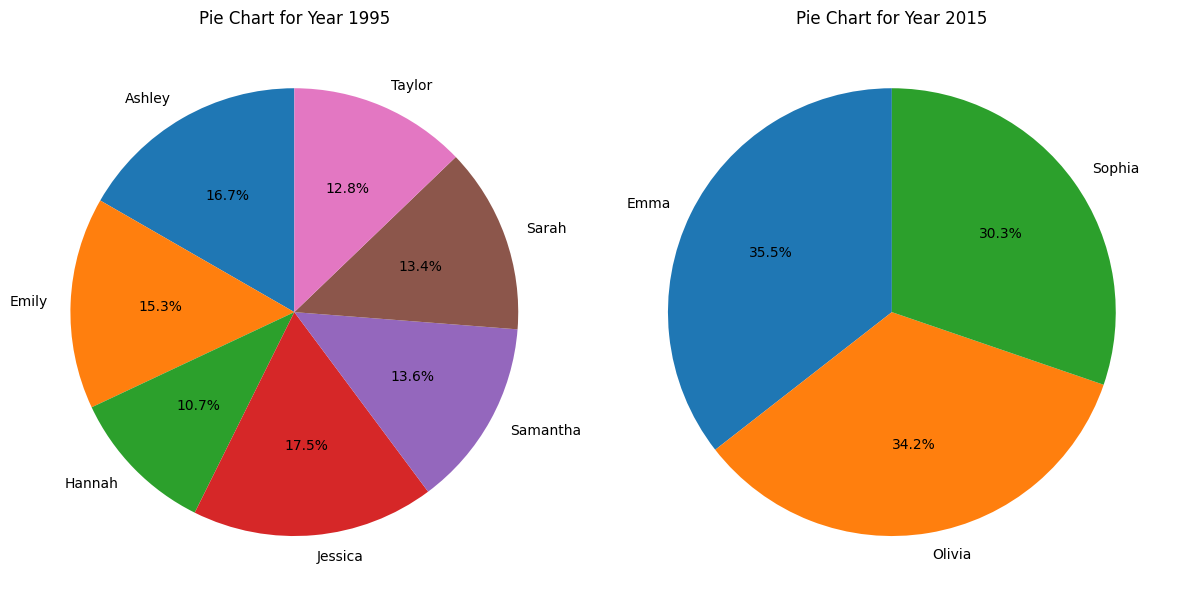

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
# top 10 female names
grouped = top10_femalenames.groupby(['Year', 'Name'])['Count'].sum().reset_index()

# Create two subplots (one for each year)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot pie charts for each year
years = grouped['Year'].unique()
for i, year in enumerate(years):
    ax = axes[i]
    data_year = grouped[grouped['Year'] == year]
    counts = data_year['Count']
    names = data_year['Name']
    ax.pie(counts, labels=names, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart for Year {year}')

plt.tight_layout()
plt.show()

The missing values (`NaN`) simply indicate that there were no children born in the United States in that year. In this case, it makes sense to fill these `NaN` values with 0. (Technically, if you read [the documentation](https://www.ssa.gov/OACT/babynames/limits.html), it actually means that fewer than 5 children were born with that name in that year.)

# Merging (a.k.a. Joining)

More commonly, the data sets that we want to combine actually contain different information about the same observations. In other words, instead of stacking the `DataFrame`s on top of each other, as in concatenation, we want to stack them next to each other. The process of combining columns or variables from different data sets is known as _merging_ or _joining_.

![](https://github.com/dlsun/pods/blob/master/09-Joining-Tabular-Data/merge.png?raw=1)

The observations may be in a different order in the two data sets, so merging is not as simple as placing the two `DataFrame`s side-by-side.  In other words, _merging_ is an operation on two `DataFrame`s that returns a third `DataFrame`. By convention, the first `DataFrame` is referred to as the one on the "left", while the second `DataFrame` is the one on the "right".

This naming convention is reflected in the syntax of the `.merge()` function in `pandas`. In the code below, the "left" `DataFrame`, `names1995`, is quite literally on the left in the code, while the "right" `DataFrame`, `names2015`, is to the right. We also specify the variables to match across the two `DataFrame`s.

In [71]:
names1995.merge(names2015, on=["Name", "Sex"])

,Name,Sex,Count_x,Year_x,Count_y,Year_y
0,Jessica,F,27935,1995,1587,2015
1,Ashley,F,26603,1995,3424,2015
2,Emily,F,24378,1995,11786,2015
3,Samantha,F,21646,1995,5340,2015
4,Sarah,F,21369,1995,4521,2015
...,...,...,...,...,...,...
15675,Zephan,M,5,1995,23,2015
15676,Zeppelin,M,5,1995,70,2015
15677,Zerek,M,5,1995,5,2015
15678,Ziggy,M,5,1995,44,2015


The variables that we joined on (**Name** and **Sex**) appear once in the final `DataFrame`. The variable **Count**, which we did not join on, appears twice---since there was a column called **Count** in both of the original `DataFrame`s. Notice that `pandas` automatically appended the suffix **_x** to the name of the variable from the left `DataFrame` and **_y** to the one from the right `DataFrame`. We can customize the suffixes by specifying the `suffixes=` parameter.

In [72]:
names1995.merge(names2015, on=["Name", "Sex"], suffixes=("1995", "2015"))

,Name,Sex,Count1995,Year1995,Count2015,Year2015
0,Jessica,F,27935,1995,1587,2015
1,Ashley,F,26603,1995,3424,2015
2,Emily,F,24378,1995,11786,2015
3,Samantha,F,21646,1995,5340,2015
4,Sarah,F,21369,1995,4521,2015
...,...,...,...,...,...,...
15675,Zephan,M,5,1995,23,2015
15676,Zeppelin,M,5,1995,70,2015
15677,Zerek,M,5,1995,5,2015
15678,Ziggy,M,5,1995,44,2015


In the code above, we assumed that the columns that we joined on had the same names in the two data sets. What if they had different names? How do we go about it?

Write your answer below :)

This only worked because the left `DataFrame` had an index with two levels, which were joined to two columns from the right `DataFrame`.

# Advanced: Many-to-Many Relationships: A Cautionary Tale

As we discussed in our lecture slides, it is also possible for multiple rows in the left `DataFrame` to match multiple rows in the right `DataFrame`. In this case, the two data sets are said to have a _many-to-many relationship_. Many-to-many joins can lead to misleading analyses, so it is important to exercise caution when working with many-to-many relationships.

For example, in the baby names data set, the **Name** variable is not uniquely identifying. For example, there are both males and females with the name "Jessie".

In [53]:
jessie1995 = names1995[names1995["Name"] == "Jessie"]
jessie1995

,Name,Sex,Count,Year
248,Jessie,F,1138,1995
16047,Jessie,M,903,1995


In [54]:
jessie2015 = names2015[names2015["Name"] == "Jessie"]
jessie2015

,Name,Sex,Count,Year
615,Jessie,F,469,2015
20009,Jessie,M,233,2015


If we join these two `DataFrame`s on **Name**, then we will end up with a many-to-many join, since each "Jessie" row in the 1995 data will be paired with each "Jessie" row in the 2015 data.

In [74]:
jessie1995.merge(jessie2015, on=["Name","Sex"], suffixes=('1995', '2015'))

# I just added 'Sex' to show how adding that makes sure that Jessie being a F/M does not merge into the same one

,Name,Sex,Count1995,Year1995,Count2015,Year2015
0,Jessie,F,1138,1995,469,2015
1,Jessie,M,903,1995,233,2015


Notice that Jessie ends up appearing four times:

- Female Jessies from 1995 are matched with female Jessies from 2015. (Good!)
- Male Jessies from 1995 are matched with male Jessies from 2015. (Good!)
- Female Jessies from 1995 are matched with male Jessies from 2015. (This is perhaps undesirable.)
- Male Jessies from 1995 are matched with female Jessies from 2015. (Also unexpected and undesirable.)

If we had used a data set like this to determine the number of Jessies in 1995, then we would end up with the wrong answer, since we would have double-counted both female and male Jessies as a result of the many-to-many join. This is why it is important to exercise caution when working with (potential) many-to-many relationships.